# Exploratory Data Analysis on Annual Reports

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and total
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [17]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('pickle/dtm_AnnualR.pkl')
data = data.transpose()
data.head()

,ABN_AMRO_Group_(2018),AGNC_Investment_(2018).pdf,Acer_(2018).pdf,Autohome_(2018).pdf,BAIC_Motor_Corporation_(2018).pdf,Carlsberg_(2018).pdf,Close_Brothers_Group_(2018).pdf,Deutsche_Bank_(2018).pdf,Edison_International_(2018).pdf,Genworth_Mortgage_Insurance_Australia_(2018).pdf,HCP_(2018).pdf,Japan_Post_Bank_(2018).pdf,Lynas_(2018).pdf,Marston's_(2018).pdf,Mitsubishi_Materials_Corporation_(2018).pdf,Modern_Times_Group_(2018).pdf,Promotora_y_Operadora_de_Infraestructura_(2018).pdf
aa,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
aacnacer,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aacnthe,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aafnagp,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Find the top 30 words per report
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_dict[c]= list(zip(top.index, top.values))

In [23]:
pd.DataFrame.from_dict(top_dict)

,ABN_AMRO_Group_(2018),AGNC_Investment_(2018).pdf,Acer_(2018).pdf,Autohome_(2018).pdf,BAIC_Motor_Corporation_(2018).pdf,Carlsberg_(2018).pdf,Close_Brothers_Group_(2018).pdf,Deutsche_Bank_(2018).pdf,Edison_International_(2018).pdf,Genworth_Mortgage_Insurance_Australia_(2018).pdf,HCP_(2018).pdf,Japan_Post_Bank_(2018).pdf,Lynas_(2018).pdf,Marston's_(2018).pdf,Mitsubishi_Materials_Corporation_(2018).pdf,Modern_Times_Group_(2018).pdf,Promotora_y_Operadora_de_Infraestructura_(2018).pdf
0,"(financial, 1235)","(securities, 435)","(financial, 783)","(nn, 1199)","(company, 487)","(nn, 4979)","(group, 527)","(financial, 1859)","(sce, 745)","(financial, 292)","(company, 358)","(bank, 503)","(financial, 331)","(nn, 702)","(sales, 114)","(financial, 690)","(nn, 1146)"
1,"(risk, 912)","(income, 335)","(company, 773)","(business, 461)","(annual, 402)","(nthe, 575)","(financial, 358)","(risk, 1499)","(edison, 624)","(risk, 172)","(million, 357)","(post, 408)","(group, 293)","(nthe, 390)","(year, 87)","(report, 565)","(toll, 949)"
2,"(funding, 857)","(value, 303)","(nn, 721)","(prc, 415)","(report, 398)","(group, 449)","(year, 308)","(management, 1161)","(million, 601)","(group, 149)","(income, 286)","(risk, 381)","(year, 254)","(group, 309)","(mmc, 78)","(management, 441)","(road, 671)"
3,"(group, 557)","(rate, 244)","(assets, 524)","(company, 408)","(motor, 391)","(dkk, 412)","(report, 306)","(bank, 946)","(international, 422)","(december, 143)","(december, 276)","(march, 374)","(june, 240)","(report, 288)","(mitsubishi, 68)","(consolidated, 435)","(concession, 661)"
4,"(value, 498)","(investment, 211)","(value, 495)","(tax, 395)","(limited, 387)","(financial, 367)","(july, 279)","(assets, 922)","(sces, 380)","(value, 136)","(financial, 251)","(management, 249)","(nn, 178)","(million, 246)","(billion, 64)","(statements, 424)","(concessions, 314)"
5,"(december, 430)","(stock, 199)","(fair, 395)","(services, 379)","(group, 380)","(nand, 222)","(risk, 260)","(group, 864)","(tax, 361)","(report, 134)","(nthe, 242)","(report, 221)","(nthe, 158)","(value, 229)","(motors, 61)","(board, 406)","(shares, 273)"
6,"(performancerisk, 426)","(net, 190)","(loss, 365)","(information, 369)","(corporation, 366)","(tax, 219)","(nthe, 241)","(board, 863)","(december, 307)","(capital, 127)","(nand, 232)","(japan, 216)","(limited, 156)","(business, 218)","(new, 53)","(group, 397)","(government, 267)"
7,"(capital, 391)","(fair, 188)","(income, 333)","(shares, 357)","(nthe, 319)","(growth, 216)","(million, 223)","(value, 847)","(costs, 293)","(genworth, 127)","(assets, 225)","(year, 212)","(report, 154)","(period, 211)","(fiscal, 47)","(corporate, 323)","(nnthe, 248)"
8,"(annual, 390)","(common, 174)","(recognized, 330)","(financial, 327)","(financial, 296)","(carlsberg, 208)","(nand, 221)","(capital, 810)","(financial, 274)","(share, 125)","(properties, 219)","(annual, 210)","(statement, 145)","(year, 200)","(vice, 42)","(year, 315)","(trust, 245)"
9,"(board, 385)","(financial, 167)","(related, 308)","(shall, 303)","(december, 280)","(net, 198)","(brothers, 207)","(credit, 762)","(income, 250)","(insurance, 122)","(nof, 217)","(ended, 187)","(performance, 144)","(statements, 171)","(march, 39)","(nthe, 290)","(december, 238)"


In [25]:
# # Print the top 15 words per report
# for company, top_words in top_dict.items():
#     print(company)
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')

At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [27]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each company
words = []
for company in data.columns:
    top = [word for (word, count) in top_dict[company]]
    for t in top:
        words.append(t)
#words

In [28]:
# Let's aggregate this list and identify the most common words along 
Counter(words).most_common()

[('financial', 14),
 ('group', 11),
 ('assets', 11),
 ('nthe', 11),
 ('report', 10),
 ('value', 9),
 ('december', 9),
 ('year', 9),
 ('board', 8),
 ('income', 8),
 ('company', 8),
 ('nn', 8),
 ('risk', 7),
 ('million', 7),
 ('nand', 7),
 ('capital', 6),
 ('annual', 6),
 ('business', 6),
 ('cash', 6),
 ('management', 6),
 ('fair', 4),
 ('net', 4),
 ('ended', 4),
 ('credit', 3),
 ('bank', 3),
 ('loss', 3),
 ('related', 3),
 ('consolidated', 3),
 ('tax', 3),
 ('shares', 3),
 ('nof', 3),
 ('committee', 3),
 ('securities', 2),
 ('rate', 2),
 ('investment', 2),
 ('share', 2),
 ('motor', 2),
 ('limited', 2),
 ('corporation', 2),
 ('directors', 2),
 ('growth', 2),
 ('billion', 2),
 ('performance', 2),
 ('remuneration', 2),
 ('march', 2),
 ('fiscal', 2),
 ('governance', 2),
 ('corporate', 2),
 ('statements', 2),
 ('sales', 2),
 ('funding', 1),
 ('performancerisk', 1),
 ('amro', 1),
 ('loans', 1),
 ('capitalleadership', 1),
 ('stock', 1),
 ('common', 1),
 ('mortgage', 1),
 ('market', 1),
 ('rate

In [29]:
# If more than half of the companies have it as a top word, exclude it from the list (financial stop word)
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['financial',
 'group',
 'assets',
 'nthe',
 'report',
 'value',
 'december',
 'year',
 'board',
 'income',
 'company',
 'nn',
 'risk',
 'million',
 'nand']

In [31]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickle/data_clean_AnnualR.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.report)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickle/cv_stop_AnnualR.pkl", "wb"))
data_stop.to_pickle("pickle/dtm_stop_AnnualR.pkl")

In [33]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

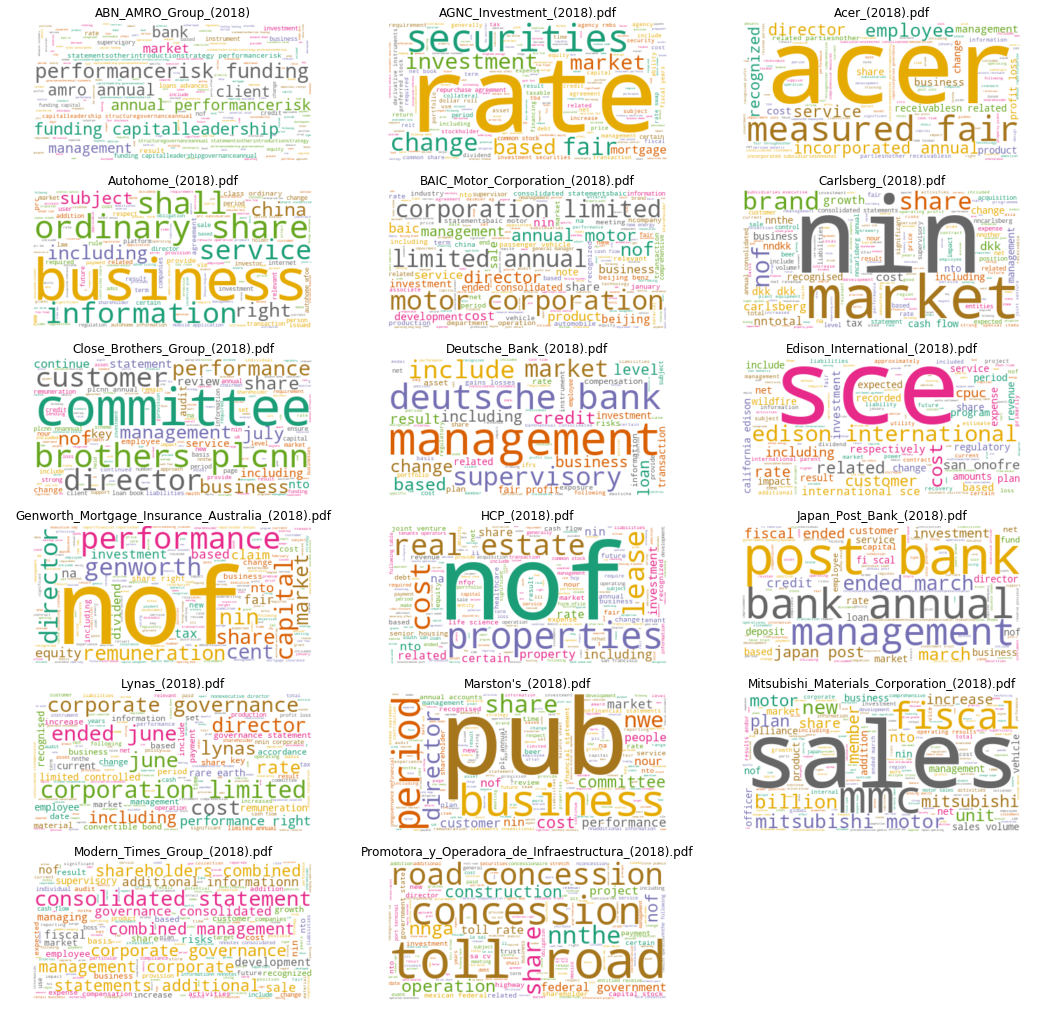

In [42]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 18]

companies = list(data_stop.index)

# Create subplots for each comedian
for index, company in enumerate(data.columns):
    wc.generate(data_clean.report[company])
    
    plt.subplot(6, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(companies[index])
    
plt.show()

## Number of Words

### Analysis

In [44]:
# Find the number of unique words that each company uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for company in data.columns:
    uniques = data[company].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(companies, unique_list)), columns=['company', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,company,unique_words
14,Mitsubishi_Materials_Corporation_(2018).pdf,2559
9,Genworth_Mortgage_Insurance_Australia_(2018).pdf,4863
1,AGNC_Investment_(2018).pdf,5479
12,Lynas_(2018).pdf,5599
16,Promotora_y_Operadora_de_Infraestructura_(2018...,5621
4,BAIC_Motor_Corporation_(2018).pdf,5827
5,Carlsberg_(2018).pdf,6089
13,Marston's_(2018).pdf,6391
11,Japan_Post_Bank_(2018).pdf,6650
10,HCP_(2018).pdf,6723


In [45]:
# Find the total number of words per document
total_list = []
for company in data.columns:
    totals = sum(data[company])
    total_list.append(totals)
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
# Sort it out
data_wpm_sort = data_words.sort_values(by='total_words')
data_wpm_sort

,company,unique_words,total_words
14,Mitsubishi_Materials_Corporation_(2018).pdf,2559,6943
9,Genworth_Mortgage_Insurance_Australia_(2018).pdf,4863,21346
12,Lynas_(2018).pdf,5599,27395
1,AGNC_Investment_(2018).pdf,5479,27530
11,Japan_Post_Bank_(2018).pdf,6650,30427
4,BAIC_Motor_Corporation_(2018).pdf,5827,32327
13,Marston's_(2018).pdf,6391,37978
6,Close_Brothers_Group_(2018).pdf,7386,38190
10,HCP_(2018).pdf,6723,41596
5,Carlsberg_(2018).pdf,6089,43289


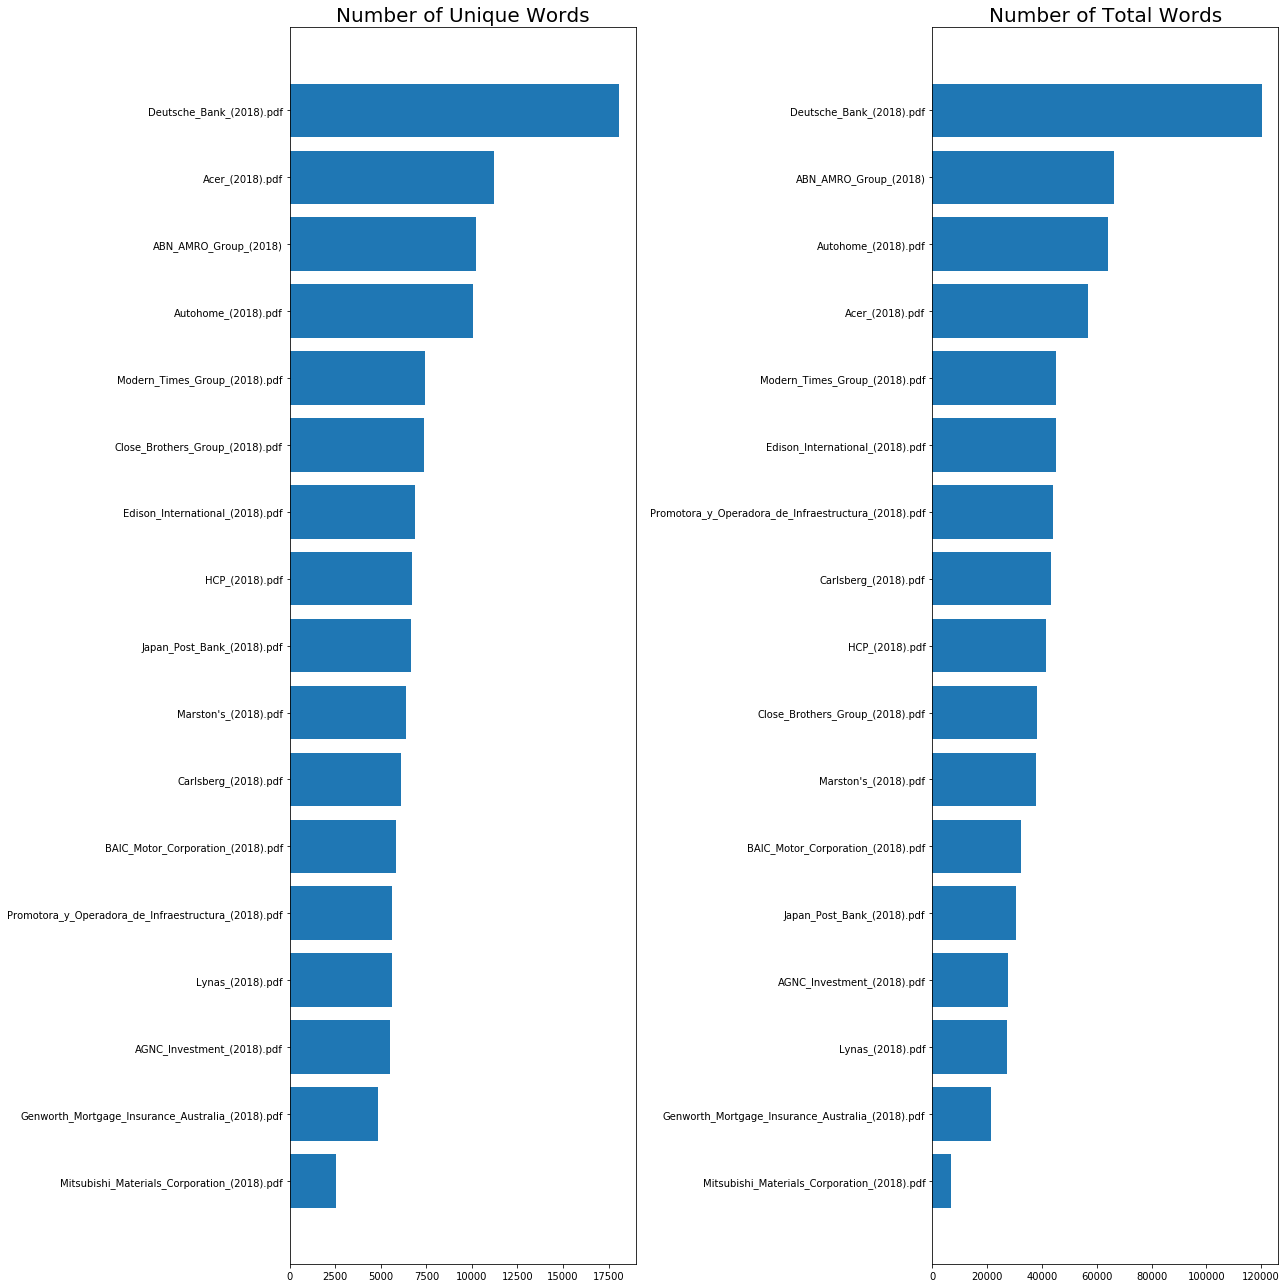

In [46]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.company)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.total_words, align='center')
plt.yticks(y_pos, data_wpm_sort.company)
plt.title('Number of Total Words', fontsize=20)

plt.tight_layout()
plt.show()

### To consider

- Proportion of the lenght of the document
- Explore semantics
- Lenght of sentences
- Distinguish and split on sections
- Complexity of words
- Categorization of relevant sections

### Analysis

In [47]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('financial', 14),
 ('group', 11),
 ('assets', 11),
 ('nthe', 11),
 ('report', 10),
 ('value', 9),
 ('december', 9),
 ('year', 9),
 ('board', 8),
 ('income', 8),
 ('company', 8),
 ('nn', 8),
 ('risk', 7),
 ('million', 7),
 ('nand', 7),
 ('capital', 6),
 ('annual', 6),
 ('business', 6),
 ('cash', 6),
 ('management', 6),
 ('fair', 4),
 ('net', 4),
 ('ended', 4),
 ('credit', 3),
 ('bank', 3),
 ('loss', 3),
 ('related', 3),
 ('consolidated', 3),
 ('tax', 3),
 ('shares', 3),
 ('nof', 3),
 ('committee', 3),
 ('securities', 2),
 ('rate', 2),
 ('investment', 2),
 ('share', 2),
 ('motor', 2),
 ('limited', 2),
 ('corporation', 2),
 ('directors', 2),
 ('growth', 2),
 ('billion', 2),
 ('performance', 2),
 ('remuneration', 2),
 ('march', 2),
 ('fiscal', 2),
 ('governance', 2),
 ('corporate', 2),
 ('statements', 2),
 ('sales', 2),
 ('funding', 1),
 ('performancerisk', 1),
 ('amro', 1),
 ('loans', 1),
 ('capitalleadership', 1),
 ('stock', 1),
 ('common', 1),
 ('mortgage', 1),
 ('market', 1),
 ('rate

In [52]:
# Let's isolate just these risk words
data_risk_words = data.transpose()[['risk', 'loss']]
data_risk_words

,risk,loss
ABN_AMRO_Group_(2018),912,103
AGNC_Investment_(2018).pdf,140,117
Acer_(2018).pdf,167,365
Autohome_(2018).pdf,43,38
BAIC_Motor_Corporation_(2018).pdf,82,60
Carlsberg_(2018).pdf,132,25
Close_Brothers_Group_(2018).pdf,260,64
Deutsche_Bank_(2018).pdf,1499,455
Edison_International_(2018).pdf,78,150
Genworth_Mortgage_Insurance_Australia_(2018).pdf,172,49


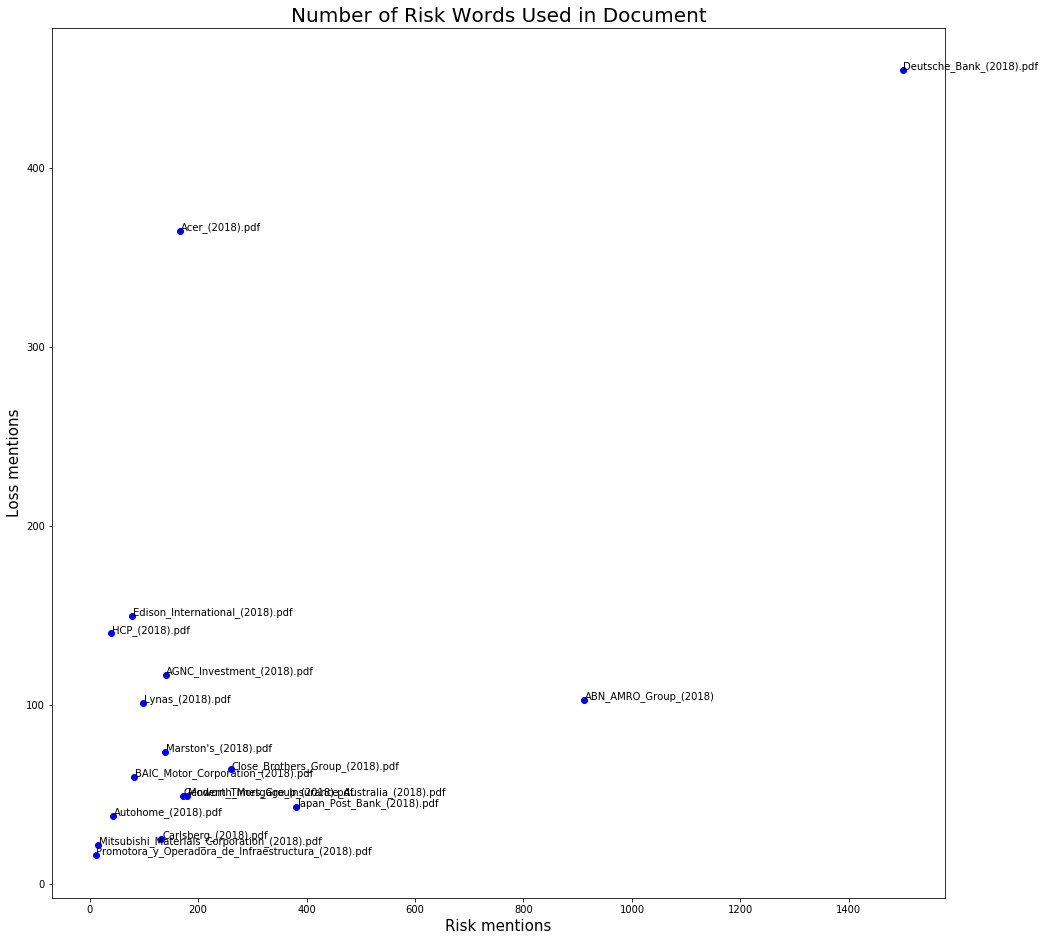

In [58]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, company in enumerate(data_risk_words.index):
    x = data_risk_words.risk.loc[company]
    y = data_risk_words.loss.loc[company]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, companies[i], fontsize=10)
    #plt.xlim(-5, 155) 
    
plt.title('Number of Risk Words Used in Document', fontsize=20)
plt.xlabel('Risk mentions', fontsize=15)
plt.ylabel('Loss mentions', fontsize=15)

plt.show()